#Business Understanding


The industry is facing an increasing challenge due to a lack of well-trained and highly motivated software developers. While high demand and low supply shake up the labor market, keeping your employees motivated and satisfied after they are hired is equally important.
I therefore aim to answer the following key questions:
1. Which countries show the highest and lowest job and career satisfaction?
2. What are the most and least important factors when assessing a potential job?
3. Which of these features are correlated?

#Data Understanding

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. 2017, they amassed more than 64,000 responses fielded from 213 countries.

The data is made up of two files:
1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

#Gather Data

Load the .csv files into pandas dataframes.

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read schema data
df_schema = pd.read_csv('../data/survey_results_schema.csv')

In [3]:
# Read survey data
df_data = pd.read_csv('../data/survey_results_public.csv')

#Assess Data

Take a first look at the dataset structure and potentially missing values.

In [4]:
# Take a look at the first rows in the survey schema
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
# Take a look at the first rows in the survey data
df_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Show sum of NaN values per feature
df_data.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [7]:
# Give an overview of the survey data both 
# for categorical and numerical features
df_data.describe(include='all')

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
count,51392.000000,51392,51392,51392,51392,51392,51392,42841,44008,38922,...,31062,35047,34938,33033,34720,34536,34419,34612,12891.000000,2566.000000
unique,NaN,5,4,201,4,7,9,16,7,10,...,5,29,10,97,5,5,5,5,NaN,NaN
top,NaN,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
freq,NaN,36131,24801,11455,37543,36148,21609,21409,15454,8587,...,18200,31589,10175,23415,11257,16061,20955,14603,NaN,NaN
mean,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56298.480641,33142.220468
std,14835.736854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39880.905277,30162.988829
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,12848.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26440.371839,4490.492484
50%,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,29364.263691
75%,38544.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80000.000000,50403.225806


#1. Which countries show the highest and lowest job and career satisfaction?

##Prepare data for question 1

In [8]:
# Have a look at the JobSatisfaction column
df_data['JobSatisfaction'].value_counts(dropna=False)


NaN     11016
8.0      8983
7.0      7969
9.0      5573
6.0      4726
10.0     4148
5.0      3749
4.0      1865
3.0      1635
2.0       888
0.0       467
1.0       373
Name: JobSatisfaction, dtype: int64

In [9]:
# Have a look at the CareerSatisfaction column
df_data['CareerSatisfaction'].value_counts(dropna=False)

8.0     11037
7.0      9384
NaN      8697
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

In [10]:
# Drop those rows where JobSatisfaction, CareerSatisfaction
# or Country column is NaN because replacing these values
# is not suitable in this case
df_q1 = df_data[['Country', 'JobSatisfaction', 'CareerSatisfaction']].copy()
df_q1 = df_q1.dropna(axis=0)
df_q1 = df_q1.drop(df_q1[df_q1['Country'] == 'I prefer not to say'].index)
df_q1['Country'].unique(), df_q1['JobSatisfaction'].unique(), df_q1['CareerSatisfaction'].unique()

(array(['United Kingdom', 'United States', 'Switzerland', 'Poland',
        'Colombia', 'France', 'Canada', 'Germany', 'Greece', 'Brazil',
        'Israel', 'Italy', 'Belgium', 'India', 'Chile', 'Croatia',
        'Argentina', 'Netherlands', 'Denmark', 'Ukraine', 'Sri Lanka',
        'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria', 'Mexico',
        'Uruguay', 'Estonia', 'Iran', 'Bangladesh', 'Sweden', 'Lithuania',
        'Russian Federation', 'Costa Rica', 'Serbia', 'Slovenia',
        'United Arab Emirates', 'Tunisia', 'El Salvador', 'Norway',
        'Romania', 'Belarus', 'Czech Republic', 'Portugal', 'Albania',
        'South Africa', 'New Zealand', 'Uzbekistan', 'Ireland', 'Nepal',
        'Hungary', 'Kenya', 'Australia', 'Japan', 'Pakistan', 'Luxembourg',
        'Bolivia', 'Vietnam', 'Slovak Republic', 'Saudi Arabia',
        'Ethiopia', 'Macedonia', 'Bulgaria', 'Bosnia-Herzegovina',
        'Algeria', 'Nicaragua', 'Cuba', 'Indonesia',
        'Netherlands Antilles', 'Jamai

In [11]:
# Engineer an additional feature with the mean of
# both JobSatisfaction and CareerSatisfaction
df_q1 = pd.concat(
    [
        df_q1,
        ((df_q1['JobSatisfaction'] + df_q1['CareerSatisfaction']) / 2).rename(
            'CombinedSatisfaction'
        ),
    ],
    axis=1,
)

In [12]:
# Drop those countries with less than 100 respondents
# to avoid statiscally insignificant entries
country_count = df_q1['Country'].value_counts()
country_count = country_count[country_count >= 100]
list_country_keep = list(country_count.index)
df_q1 = df_q1[df_q1['Country'].isin(list_country_keep)]

In [13]:
# Compute the mean per country of columns
# CareerSatisfaction, JobSatisfaction, and
# CombinedSatisfaction.
df_q1 = df_q1.groupby(['Country']).agg(
    {
        'CareerSatisfaction': ['mean'],
        'JobSatisfaction': ['mean'],
        'CombinedSatisfaction': ['mean'],
    }
)
# Rename columns
df_q1.columns = ['career_mean', 'job_mean', 'combined_mean']
# Sort by mean CombinedSatisfaction
df_q1 = df_q1.sort_values('combined_mean', ascending=True)
df_q1.head()

,career_mean,job_mean,combined_mean
Country,,,
Japan,6.235294,5.828431,6.031863
India,6.713117,6.162576,6.437846
Bangladesh,6.834646,6.228346,6.531496
China,6.649718,6.429379,6.539548
South Korea,6.672897,6.457944,6.565421


##Plot results for question 1

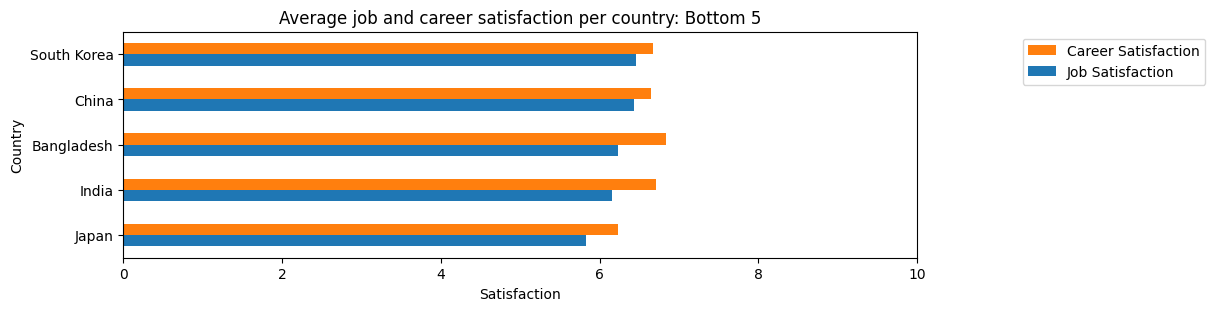

In [14]:
# Plot bottom 5 countries
fig, ax = plt.subplots(layout='constrained')
df_q1[['job_mean', 'career_mean']][:5].plot(
    kind='barh',
    ylabel='Country',
    xlabel='Satisfaction',
    title='Average job and career satisfaction per country: Bottom 5',
    xlim=[0, 10],
    figsize=[12, 3],
    ax=ax,
)
ax.legend(
    reversed(ax.legend().legendHandles), ['Career Satisfaction', 'Job Satisfaction'],
    bbox_to_anchor=(1.372, 1),
)

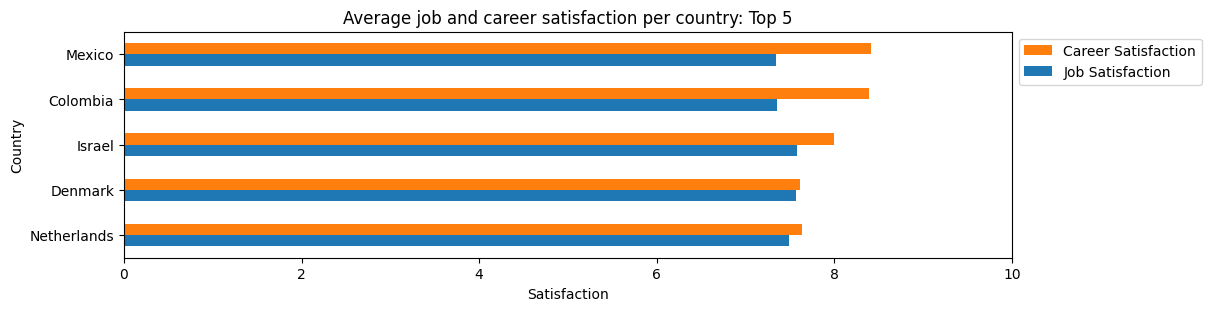

In [15]:
# Plot top 5 countries
fig, ax = plt.subplots(layout='constrained')
df_q1[['job_mean', 'career_mean']][-5:].plot(
    kind='barh',
    ylabel='Country',
    xlabel='Satisfaction',
    title='Average job and career satisfaction per country: Top 5',
    xlim=[0, 10],
    figsize=[12, 3],
    ax=ax,
)
ax.legend(
    reversed(ax.legend().legendHandles), ['Career Satisfaction', 'Job Satisfaction'],
    bbox_to_anchor=(1, 1),
)

##Conclusion for question 1

Interestingly, the five countries with the lowest overall job and career satisfaction are in East and Southeast Asia. The five countries with the highest overall satisfaction, on the other hand, are located in Latin America, Europe, and the Middle East. Another phenomenon that should be investigated further is that career satisfaction is higher than job satisfaction in all ten countries. This knowledge could be useful in developing additional measures to improve overall satisfaction.

#2. What are the most and least important factors when assessing a potential job?

##Prepare data for question 2

In [16]:
# Select the country column and only those columns that 
# are relevant for the assessment of potential jobs
df_q2 = df_data.filter(regex=('^AssessJob.*|Country'))
df_q2.isnull().sum(), df_q2.shape

(Country                      0
 AssessJobIndustry        29262
 AssessJobRole            29245
 AssessJobExp             29256
 AssessJobDept            29269
 AssessJobTech            29203
 AssessJobProjects        29209
 AssessJobCompensation    29246
 AssessJobOffice          29388
 AssessJobCommute         29419
 AssessJobRemote          29372
 AssessJobLeaders         29406
 AssessJobProfDevel       29394
 AssessJobDiversity       29414
 AssessJobProduct         29395
 AssessJobFinances        29369
 dtype: int64,
 (51392, 16))

In [17]:
# Show which columns have been selected
df_q2.columns

Index(['Country', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp',
       'AssessJobDept', 'AssessJobTech', 'AssessJobProjects',
       'AssessJobCompensation', 'AssessJobOffice', 'AssessJobCommute',
       'AssessJobRemote', 'AssessJobLeaders', 'AssessJobProfDevel',
       'AssessJobDiversity', 'AssessJobProduct', 'AssessJobFinances'],
      dtype='object')

In [18]:
# Rename the columns to a more readable label
df_q2.columns = [
    'Country',
    'Industry',
    'Job Title',
    'Experience level',
    'Department',
    'Used technologies',
    'Project management',
    'Compensation',
    'Office environment',
    'Commuting duration',
    'Remote work',
    'Reputation of leaders',
    'Professional development',
    'Diversity',
    'Impact of product',
    'Funding status',
]

In [19]:
# Drop rows that include NaN values. A preliminary 
# investigation showed that participants either 
# answered all questions or none. Thus replacing
# missing values is not feasible here.
df_q2 = df_q2.dropna(
    axis=0
)
df_q2.isnull().sum(), df_q2.shape

(Country                     0
 Industry                    0
 Job Title                   0
 Experience level            0
 Department                  0
 Used technologies           0
 Project management          0
 Compensation                0
 Office environment          0
 Commuting duration          0
 Remote work                 0
 Reputation of leaders       0
 Professional development    0
 Diversity                   0
 Impact of product           0
 Funding status              0
 dtype: int64,
 (20661, 16))

In [20]:
# Map the categorical answers to numerical values 
df_q2.replace(
    [
        'Not very important',
        'Very important',
        'Somewhat important',
        'Important',
        'Not at all important',
    ],
    [0.25, 1, 0.5, 0.75, 0],
    inplace=True,
)
df_q2.reset_index(drop=True, inplace=True)
df_q2.head()

,Country,Industry,Job Title,Experience level,Department,Used technologies,Project management,Compensation,Office environment,Commuting duration,Remote work,Reputation of leaders,Professional development,Diversity,Impact of product,Funding status
0,United States,1.00,1.00,0.75,1.00,1.00,1.00,0.75,1.00,1.00,1.0,1.00,1.00,0.50,0.25,0.50
1,United States,0.50,0.50,0.50,0.75,0.75,1.00,0.75,1.00,0.75,0.5,0.25,1.00,0.75,1.00,1.00
2,New Zealand,0.75,0.50,0.75,0.75,0.50,0.50,0.75,0.50,0.75,0.5,0.00,0.50,0.50,0.50,0.25
3,United States,0.50,1.00,0.25,0.75,0.75,1.00,0.75,0.75,0.75,1.0,1.00,1.00,0.50,0.25,1.00
4,Poland,0.25,0.75,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.5,0.50,0.75,0.25,0.50,0.25


##Plot results for question 2

array([[<AxesSubplot: title={'center': 'Industry'}>,
        <AxesSubplot: title={'center': 'Job Title'}>,
        <AxesSubplot: title={'center': 'Experience level'}>,
        <AxesSubplot: title={'center': 'Department'}>],
       [<AxesSubplot: title={'center': 'Used technologies'}>,
        <AxesSubplot: title={'center': 'Project management'}>,
        <AxesSubplot: title={'center': 'Compensation'}>,
        <AxesSubplot: title={'center': 'Office environment'}>],
       [<AxesSubplot: title={'center': 'Commuting duration'}>,
        <AxesSubplot: title={'center': 'Remote work'}>,
        <AxesSubplot: title={'center': 'Reputation of leaders'}>,
        <AxesSubplot: title={'center': 'Professional development'}>],
       [<AxesSubplot: title={'center': 'Diversity'}>,
        <AxesSubplot: title={'center': 'Impact of product'}>,
        <AxesSubplot: title={'center': 'Funding status'}>,
        <AxesSubplot: >]], dtype=object)

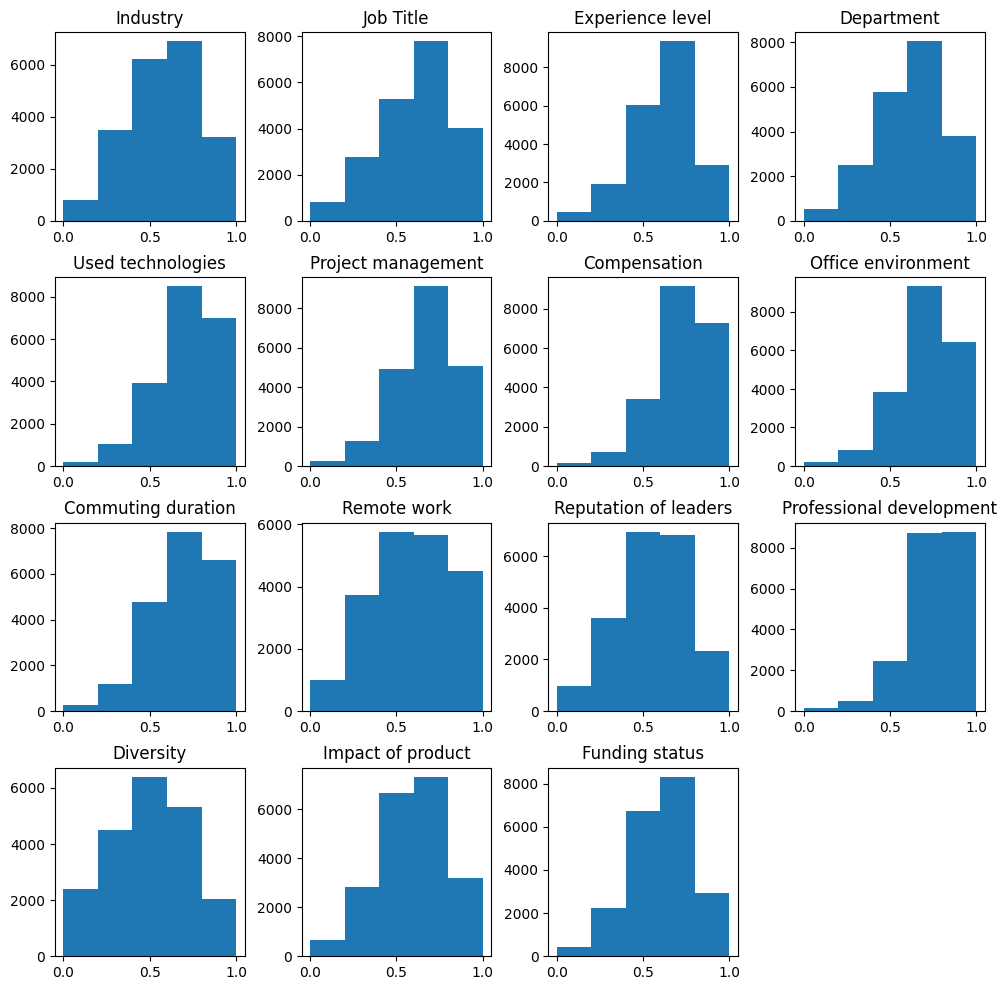

In [21]:
# Plot multiple histograms for the assessment questions
df_q2.hist(figsize=(12,12), grid=False, align='mid', bins=5)

Text(-0.05, 0.5, 'Count')

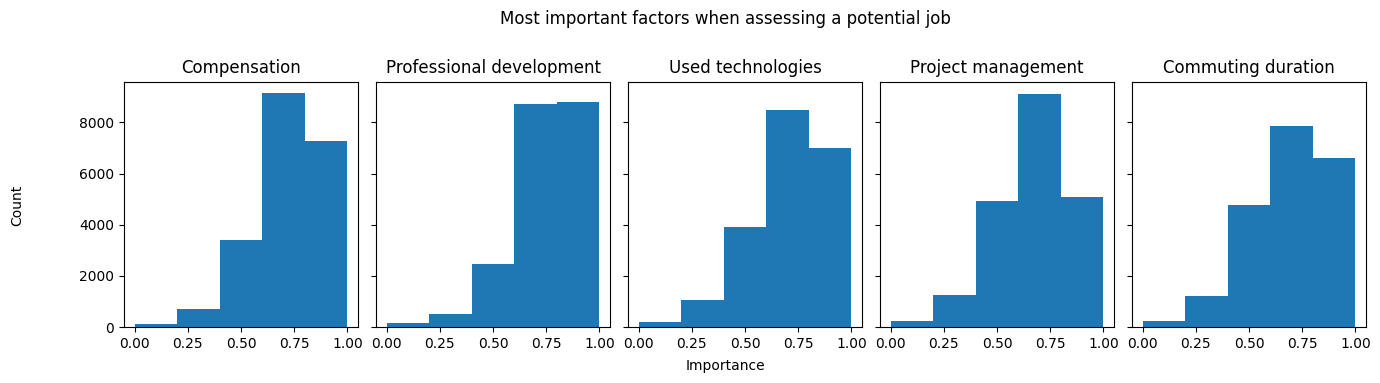

In [22]:
# Plot a selection of histograms for the assessment questions
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(13,3), layout='constrained')
df_q2.hist(
    column=[
        'Compensation',
        'Professional development',
        'Used technologies',
        'Project management',
        'Commuting duration',
    ],
    grid=False,
    align="mid",
    bins=5,
    ax=ax,
)
plt.suptitle('Most important factors when assessing a potential job', x=0.5, y=1.15, ha='center', fontsize='large')
fig.text(0.5, -0.05, 'Importance', ha='center')
fig.text(-0.05, 0.5, 'Count', va='center', rotation='vertical')

##Conclusion for question 2

I'd like to focus on the five most important questions for survey participants out of the total fifteen that have been asked. The left-skewed histograms show that, despite an increasing preference for work-life balance, potential job applicants value compensation and professional development. However, the amount of time spent commuting is also important to potential applicants. Languages, frameworks, and other technologies with which the developer will be working, as well as how projects are managed at the company or organization, have a similar, albeit less significant, distribution.

#3. Which of job assessment features are correlated?

##Prepare data for question 3

In [23]:
# Generate a dataframes with the answered job assessment 
# questions without the country column
df_q3 = df_q2.filter(regex=('^(?!Country)'))

In [24]:
# Compute the Pearson correlation coefficient matrix
df_q3_corr = df_q3.corr(method='pearson')
df_q3_corr.head()

,Industry,Job Title,Experience level,Department,Used technologies,Project management,Compensation,Office environment,Commuting duration,Remote work,Reputation of leaders,Professional development,Diversity,Impact of product,Funding status
Industry,1.000000,0.243057,0.161132,0.322209,0.133079,0.178569,0.041615,0.151674,0.031298,0.028478,0.203703,0.145729,0.232680,0.322420,0.138606
Job Title,0.243057,1.000000,0.291533,0.266628,0.172556,0.134212,0.163021,0.131399,0.043486,0.028776,0.163766,0.156710,0.130080,0.166863,0.188139
Experience level,0.161132,0.291533,1.000000,0.164934,0.209823,0.130148,0.154009,0.110444,0.101691,0.055481,0.163626,0.126473,0.110351,0.114332,0.166980
Department,0.322209,0.266628,0.164934,1.000000,0.139810,0.278559,0.103946,0.208509,0.084839,0.046635,0.204722,0.158876,0.189107,0.222741,0.158751
Used technologies,0.133079,0.172556,0.209823,0.139810,1.000000,0.156047,0.128057,0.127890,0.104362,0.103801,0.070297,0.126162,0.053104,0.098015,0.101994


In [25]:
# Check what the smallest and average correlation coefficient is
df_q3_corr.min().min(), df_q3_corr.mean().mean()

(0.018051338167295906, 0.21325220865899386)

##Plot results for question 3

Text(0.5, 1.0, 'Correlation heatmap')

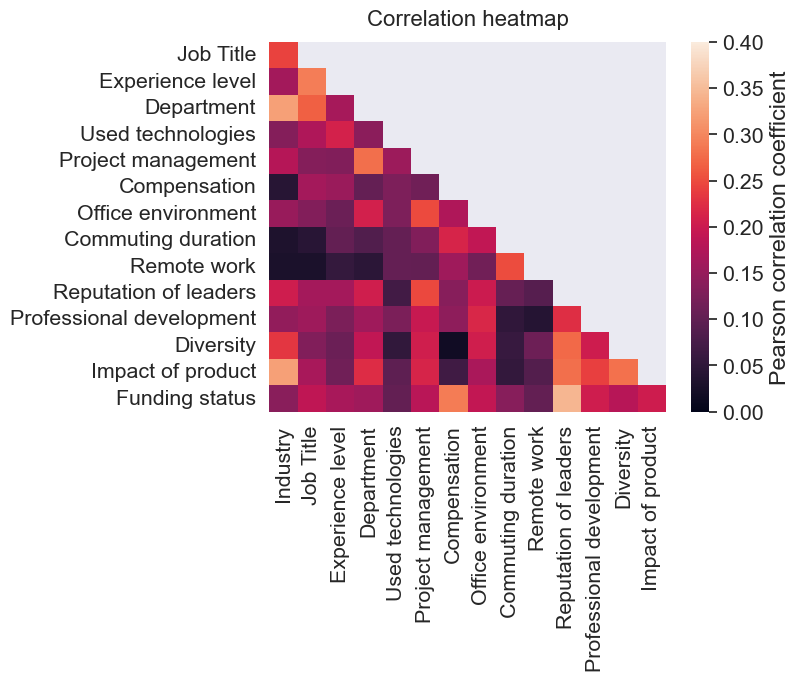

In [26]:
# Plot a lower triangular heatmap of the correlation coefficient matrix
sns.set(font_scale=1.4)
df_q3_corr.drop(df_q3_corr.columns[0], axis=0, inplace=True)
df_q3_corr.drop(df_q3_corr.columns[-1], axis=1, inplace=True)
mask = np.transpose(np.tri(df_q3_corr.shape[0], df_q3_corr.shape[1], -1))
heatmap = sns.heatmap(
    df_q3_corr,
    vmin=0,
    vmax=0.4,
    mask=mask,
    cbar_kws={'label': 'Pearson correlation coefficient'},
)
heatmap.set_title('Correlation heatmap', fontdict={'fontsize': 16}, pad=12)

##Conclusion for question 3

The Pearson correlation coefficient varies between -1 and 1. Greater absolute values indicate a linear relationship between two features X and Y. The regression slope determines the sign of the correlation: a value of +1 suggests that all data points lie on a line where Y increases as X increases, and vice versa for -1; i.e., one of the features increases as the other decreases. A value of 0 indicates that there is no linear relationship between the features.

Over all feature pairs, the mean correlation coefficient is 0.21, while the minimum correlation coefficient is 0.02. This already suggests that the majority of the features have some positive linear relationships and that there are no feature pairs where a higher importance for one feature goes along with a lower importance for the other.
Furthermore, some feature pairings have a substantially stronger correlation than others, such as the importance of a given industry and department, or the industry and influence of the company's product, or financial performance and senior leaders' reputations.

Correlation, however, does not imply causality. As a result, these findings should be examined further in order to gain valuable insight into what motivates software engineers and other IT personnel in a competitive labor market. This analysis could be a good place to start.